# Linear Regression

In this notebook we will implement linear regression from scratch and solve for OLS estimators. We will then use them to predict repair turnaround time from repair costs in the Rice Bikes transactions dataset.

## 0. Imports & Data

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

In [17]:
df = pd.read_csv("../../data/rb_tx_data.csv")

df = df.loc[(df['TotalCost']>0) & 
            (df['TurnaroundTime']>0) &
            (df['TurnaroundTime']<38) &  
            (df['TransactionType']== 'inpatient') &
            (df['DayCreated']!=df['DayCompleted']) 
            ]

X = df['RepairCost']
y = df['TurnaroundTime']

## 1. OLS Implementation

In [4]:
def ols_slope_estimator(X, y):
    '''
    Estimator of the slope of a regression line which minimizes RSS
    '''
    x_bar = np.mean(X)
    y_bar = np.mean(y)
    return ((X -x_bar) @ (y - y_bar)) / ((X -x_bar) @ (X -x_bar))


In [5]:
def ols_intercept_estimator(X,y):
    """
    Estimator of the intercept of a regression line which minimizes RSS
    """
    x_bar = np.mean(X)
    y_bar = np.mean(y)
    beta_1_hat = ols_slope_estimator(X,y)
    return y_bar - beta_1_hat * x_bar

In [6]:
def predict(X, intercept, slope):
    """
    Using the given slope and intercept estimators, 
    predict a linear regression line on the given input data.    
    """
    return intercept + slope*X

In [7]:
def residual_sum_squares(b_0, b_1, X,y):
    return (y - predict(X, b_0, b_1)) @ (y - predict(X, b_0, b_1))

In [8]:
def sum_squares_total(y):
    y_bar = np.mean(y)
    return (y-y_bar)@ (y-y_bar)

In [12]:
def r_squared(b_0, b_1, X,y):
    """
    Calculate r^2, the porportion of 
    variance of y explained by X
    """
    return 1- (residual_sum_squares(b_0,b_1,X,y)/sum_squares_total(y))

## 2. Application & Evaluation

In [9]:
beta_0_hat = ols_intercept_estimator(X,y)
beta_1_hat = ols_slope_estimator(X,y)
y_pred = predict(X, beta_0_hat, beta_1_hat)

beta_1_hat, beta_0_hat

(0.03501796708015711, 11.680271740164216)

Each additional 10 dollars of repairs increases expected turnaround time by 0.35 shifts or approximately 1 hour. Furthermore, the expected turnaround time for a transaction with 0 repair costs is 11.6 shifts or approximately 4 days.

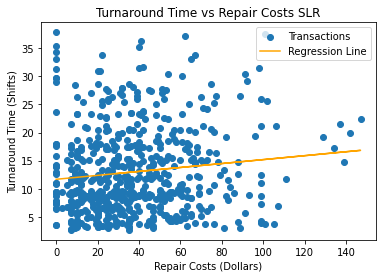

In [13]:
plt.scatter(X,y, label="Transactions")
plt.plot(X,y_pred, color="orange", label="Regression Line")
plt.xlabel("Repair Costs (Dollars)")
plt.ylabel("Turnaround Time (Shifts)")
plt.title("Turnaround Time vs Repair Costs SLR")
plt.legend()
plt.show()

Text(0, 0.5, 'Residuals')

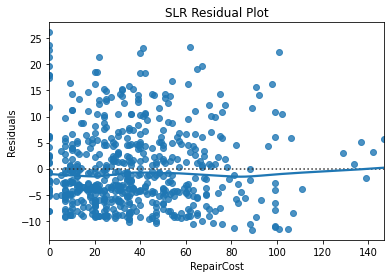

In [15]:
sns.residplot(x=X,y=y, lowess=True)
plt.title("SLR Residual Plot")
plt.ylabel("Residuals")

In [16]:
r_squared(beta_0_hat, beta_1_hat, X,y)

0.014738505582768235

Our SLR model based on repair costs only explains approximately 1.4% of the total variance of the turnaround time. 

In [17]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

X = X.to_numpy().reshape(-1,1)
model.fit(X,y)
model.score(X,y)

0.014738505582767791

We can confirm that our implementation is correct by comparing it to Scikit Learn